# Importation

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree, metrics

## Create data

In [21]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=2000, n_features=2, centers = 2, random_state = 0)

# Training phase

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

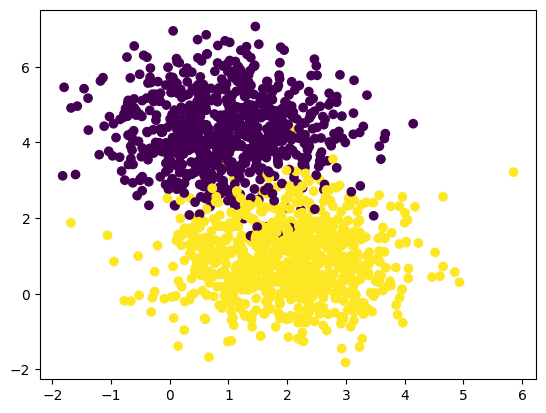

In [57]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.show()

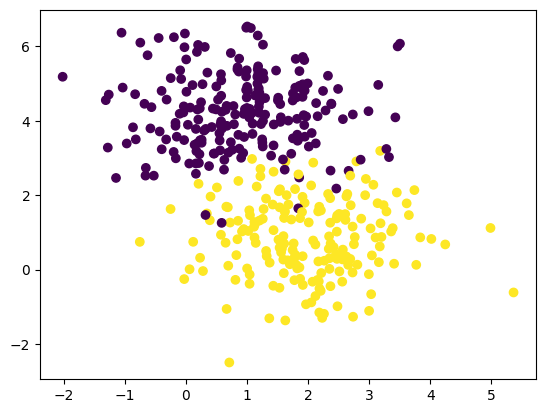

In [59]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)
plt.show()

In [23]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [24]:
%%time
clf.fit(X_train, y_train)

CPU times: user 5.9 ms, sys: 0 ns, total: 5.9 ms
Wall time: 6.47 ms


DecisionTreeClassifier()

In [25]:
max_depth = clf.get_depth()
print(max_depth)

12


In [26]:
# from sklearn import tree
# tree.plot_tree(clf, rounded = True, filled = True)
# plt.show()

In [27]:
y_pred = clf.predict(X_test)

In [28]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       215
           1       0.93      0.94      0.93       185

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



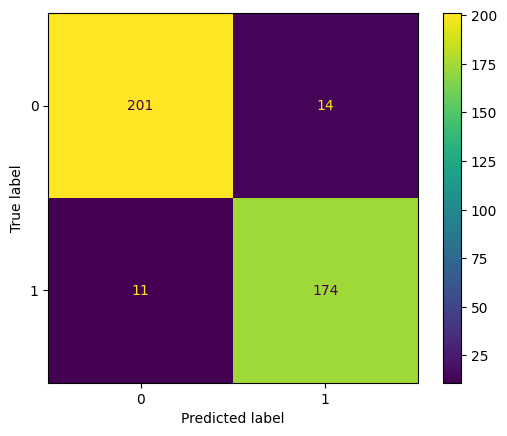

In [29]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()


# With Entropy

In [30]:
clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [31]:
max_depth = clf.get_depth()
print(max_depth)

12


In [32]:
y_pred = clf.predict(X_test)

In [33]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       215
           1       0.95      0.94      0.95       185

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



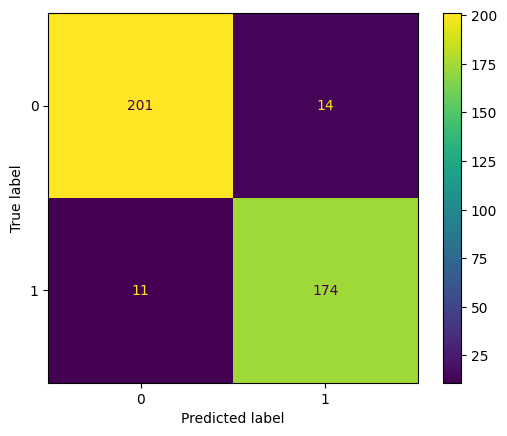

In [34]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_diplay = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

### Pre-running

In [37]:
clf = DecisionTreeClassifier()

from sklearn.model_selection import GridSearchCV

grid_param = {
    "criterion": ["gini", "entropy"],
    "max_depth": range(1, 5, 1),
    "min_samples_leaf": range(1, 15, 1),
    "min_samples_split": range(2, 20, 1),
}

grid_search = GridSearchCV(estimator = clf, param_grid=grid_param, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 5),
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(2, 20)})

In [40]:
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


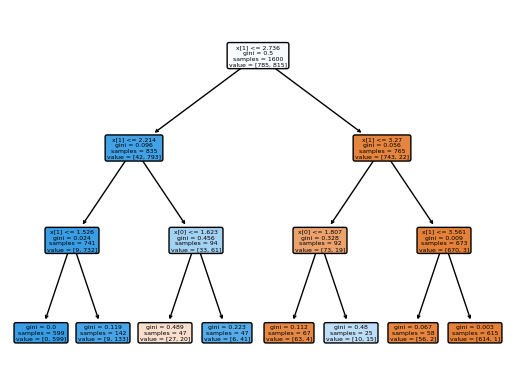

In [44]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth= 3, min_samples_leaf= 1, min_samples_split= 2)
clf.fit(X_train, y_train)
tree.plot_tree(clf, rounded = True, filled = True)
plt.show()

In [46]:
y_pred = clf.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       215
           1       0.95      0.96      0.95       185

    accuracy                           0.95       400
   macro avg       0.95      0.96      0.95       400
weighted avg       0.96      0.95      0.96       400



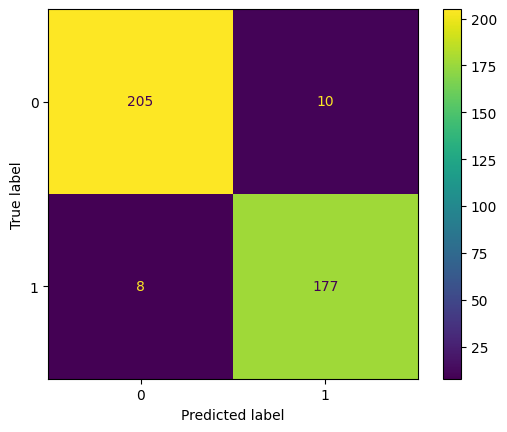

In [47]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

# Post-pruning

In [48]:
clf = DecisionTreeClassifier()

grid_param = {
    "criterion": ["gini", "entropy"],
    "max_depth": range(1, 5, 1),
    "min_samples_leaf": range(1, 15, 1),
    "min_samples_split": range(2, 20, 1),
}

grid_search = GridSearchCV(estimator = clf, param_grid=grid_param, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 5),
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(2, 20)})

In [50]:
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


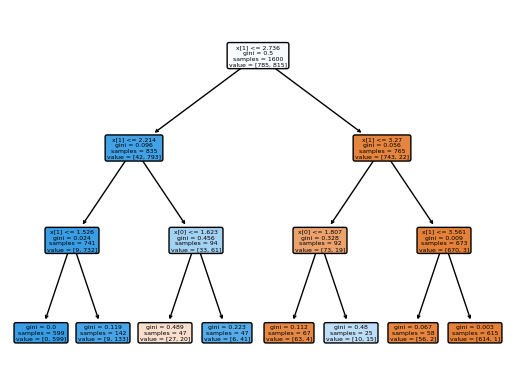

In [53]:
clf = DecisionTreeClassifier(criterion = "gini", max_depth = 3, min_samples_leaf = 1, min_samples_split = 2)

clf.fit(X_train, y_train)
tree.plot_tree(clf, rounded=True, filled=True)
plt.show()

In [54]:
y_pred = clf.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       215
           1       0.95      0.96      0.95       185

    accuracy                           0.95       400
   macro avg       0.95      0.96      0.95       400
weighted avg       0.96      0.95      0.96       400



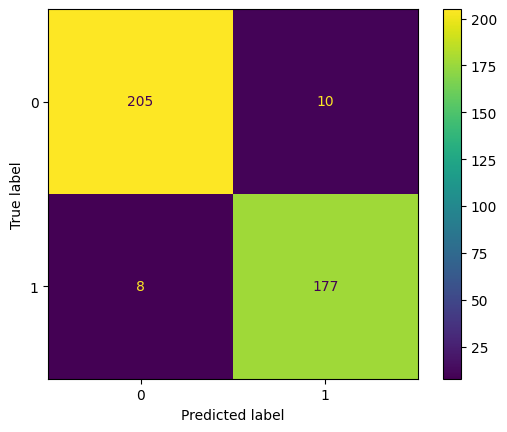

In [55]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()